# **Etapa 2: Análisis de datos exploratorio**


En esta práctica realizaremos un poco de análisis de datos exploratorio en la búsqueda de patrones en los datos y así determinar que valores deberíamos usar para realizar predicciones en un futuro.

Veremos si podemos predecir la probabilidad de éxito basandonos en ciertas categorías.



## Objectivos

Realizar un análisis exploratorio de los datos y obtener nuestras primeras conclusiones.


***


## Importación de librerias

In [29]:
import pandas as pd
import numpy as np

### Análisis de datos.


Carga el archivo `.csv` generado en la práctica anterior. Recuerda que primero deberás subir el archivo a google collab.

In [30]:
df=pd.read_csv("./dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Payload,Orbit,LaunchSite,LandingOutcome,Flights,GridFins,Reused,Legs,LandingPad,Block,Customers,Mission_Outcome,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,Dragon Qualification Unit,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,SpaceX,True,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,COTS Demo Flight 2,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,NASA(COTS),True,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,CRS-2,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,NASA (CRS),True,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,CASSIOPE,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,MDA,True,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,SES-8,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,SES,True,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,Thaicom 6,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,Thaicom,True,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,CRS-3,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,NASA (CRS),True,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,Orbcomm-OG2-M1,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,Orbcomm,True,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,AsiaSat 8,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,AsiaSat,True,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,AsiaSat 6,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,AsiaSat,True,0,B1011,-80.577366,28.561857


### Tarea 1: Calcula el número de lanzamientos en cada plataforma.

Los datos contienen diferentes plataformas como:


*   El complejo de lanzamiento de Cabo Cañaveral (VAFB SLC 4E)
*   La base de las fuerzas aéreas de Vanderberg (SLC-4E)
* El centro de lanzamientos Kennedy (KSC LC 39A).
Veamos cual de ellas es mas popular:





*Utilizando el método `value_counts()` en la columna `LaunchSite` determina el número de lanzamientos en cada plataforma.*

In [31]:
#INSERTA AQUÍ TU CÓDIGO
df.value_counts('LaunchSite')

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
dtype: int64

### Tarea 2: Calcula el número de lanzamientos para cada órbita.


Cada lanzamiento tiene como objetivo una órbita diferente, estas son las más comunes:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


*Utilizando el método `value_counts()` en la columna `Orbit` determina el número de lanzamientos en cada órbita.*



In [32]:
#INSERTA AQUÍ TU CÓDIGO
df.value_counts('Orbit')


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
dtype: int64

### Tarea 3: Calcula el número de diferentes resultados de aterrizaje, distingue los exitosos de los fallidos.


*Utilizando el método `value_counts()` en la columna `LandingOutcome` determina el número de lanzamientos en cada órbita. Asigna el resultado a la varibale `landing_outcomes`.*


In [36]:
#INSERTA AQUÍ TU CÓDIGO
landing_outcomes=df.value_counts('LandingOutcome')
landing_outcomes

LandingOutcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
dtype: int64

Observemos que la variable `LandingOutcome` esta separada en 2 partes. 

La primera toma valores `True`,`False` y `None`. 
*   `True` implica que el cohete aterrizó con éxito.
*   `False` implica que el cohete no aterrizó con éxito
* `None` implica que el cohete no inició el aterrizaje.

La segunda parte toma valores `ASDS`,`Ocean`, `RTLS` y `None`.
* `ASDS` implica que el cohete tenía intención de aterrizar sobre un portaaviones.
* `Ocean` implica que el cohete tenía intención de aterrizar en el oceano.
* `RTLS` implica que el cohete tenía intención de aterrizar sobre una plataforma terrestre .
* `None` implica que el cohete no tenía intención de aterrizar.




Vamos a intentar ver que resultado ha tenido cada cohete en las diferentes órbitas.
*Crea un dataframe llamado `df2` con solamente las columnas `'Orbit','LandingOutcome'`. Aplica a este dataframe una agrupación por `'Orbit','LandingOutcome'` mediante `df2.groupby([Columnas])` y añade el atributo `.size()` para ver el número de resultados en cada categoría.

In [34]:

df2=df[['Orbit', 'LandingOutcome']]
df2.groupby(['Orbit', 'LandingOutcome']).size()

Orbit  LandingOutcome
ES-L1  True Ocean         1
GEO    True ASDS          1
GTO    False ASDS         1
       None ASDS          1
       None None         11
       True ASDS         13
       True Ocean         1
HEO    True ASDS          1
ISS    False ASDS         2
       False Ocean        1
       False RTLS         1
       None ASDS          1
       None None          3
       True ASDS          5
       True Ocean         1
       True RTLS          7
LEO    None None          2
       True Ocean         1
       True RTLS          4
MEO    None None          1
       True ASDS          2
PO     False ASDS         1
       False Ocean        1
       None None          1
       True ASDS          5
       True Ocean         1
SO     None None          1
SSO    True ASDS          2
       True RTLS          3
VLEO   False ASDS         2
       True ASDS         12
dtype: int64

En el resultado del anterior ejercicio podemos observar los diferentes resultados para cada órbita, que pese a ser detallados son confusos. Veamos como solucionar esto.


### Tarea 4: Crea una columna Class utilizando LandingOutcome


Previamente hemos guardado en `landing_outcomes` el recuento de los diferentes aterrizajes:

In [37]:
print(landing_outcomes)

LandingOutcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
dtype: int64


*La variable anterior es un diccionario, utilizandola crea un conjunto con los diferentes casos donde el cohete no aterrizó satisfactoriamente. Llama a este conjunto `bad_outcomes`*

In [53]:
#INSERTA AQUÍ TU CÓDIGO
bad_outcomes=set()
for x in landing_outcomes.keys():
  if 'False'in x or 'None'in x:
    bad_outcomes.add(x)
print(bad_outcomes)


{'None ASDS', 'False Ocean', 'None None', 'False ASDS', 'False RTLS'}


Creemonos ahora una lista llamada `landing_class` que tomará valores 0 y 1 según si el resultado es satisfactorio o no.
*Recorre para cada celda la columna `LandingOutcome`. Comprueba si el valor pertenece al conjunto `bad_outcomes`. Si pertenece adjunta un 1 a la lista `landing_class`, si no, adjunta un 0.*

In [55]:
#INSERTA AQUÍ TU CÓDIGO
landing_class=[]
for x in df['LandingOutcome']:
  if x in bad_outcomes :
    landing_class.append(1)
  else:
    landing_class.append(0)
landing_class


[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

*Añade esta lista al dataframe como una columna con nombre `Class`*

In [63]:
#INSERTA AQUÍ TU CÓDIGO
df=df.assign(Class=landing_class)
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Payload,Orbit,LaunchSite,LandingOutcome,Flights,GridFins,...,Legs,LandingPad,Block,Customers,Mission_Outcome,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,Dragon Qualification Unit,LEO,CCSFS SLC 40,None None,1,False,...,False,NaN,1.0,SpaceX,True,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.000000,COTS Demo Flight 2,LEO,CCSFS SLC 40,None None,1,False,...,False,NaN,1.0,NASA(COTS),True,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.000000,CRS-2,ISS,CCSFS SLC 40,None None,1,False,...,False,NaN,1.0,NASA (CRS),True,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.000000,CASSIOPE,PO,VAFB SLC 4E,False Ocean,1,False,...,False,NaN,1.0,MDA,True,0,B1003,-120.610829,34.632093,1
4,5,2013-12-03,Falcon 9,3170.000000,SES-8,GTO,CCSFS SLC 40,None None,1,False,...,False,NaN,1.0,SES,True,0,B1004,-80.577366,28.561857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,Starlink-11,VLEO,KSC LC 39A,True ASDS,2,True,...,True,5e9e3032383ecb6bb234e7ca,5.0,SpaceX,True,12,B1060,-80.603956,28.608058,0
86,87,2020-10-06,Falcon 9,15600.000000,Starlink-12,VLEO,KSC LC 39A,True ASDS,3,True,...,True,5e9e3032383ecb6bb234e7ca,5.0,SpaceX,True,13,B1058,-80.603956,28.608058,0
87,88,2020-10-18,Falcon 9,15600.000000,Starlink-13,VLEO,KSC LC 39A,True ASDS,6,True,...,True,5e9e3032383ecb6bb234e7ca,5.0,SpaceX,True,12,B1051,-80.603956,28.608058,0
88,89,2020-10-24,Falcon 9,15600.000000,Starlink-14,VLEO,CCSFS SLC 40,True ASDS,3,True,...,True,5e9e3033383ecbb9e534e7cc,5.0,SpaceX,True,12,B1060,-80.577366,28.561857,0


## Utilizando la columna Class.

*Calcula la media de la columna `class`. Razona que significa este valor.*



In [66]:
#INSERTA AQUÍ TU CÓDIGO
df['Class'].mean()

0.3333333333333333

Al igual que antes, podemos agrupar los lanzamientos por la órbita.
*Crea df3 donde incluyes las columnas `Orbit` y `Class`. Agrupa por `Orbit` y calcula la media.*

In [67]:
#INSERTA AQUÍ TU CÓDIGO
df3=df[['Orbit', 'Class']]
df3.groupby(['Orbit']).mean()

,Class
Orbit,
ES-L1,0.000000
GEO,0.000000
GTO,0.481481
HEO,0.000000
ISS,0.380952
LEO,0.285714
MEO,0.333333
PO,0.333333
SO,1.000000


Observemos que más de una órbita tiene una probabilidad de éxito 1. Entonces ¿Si lanzamos un cohete a esas órbitas 100% aterrizará correctamente?

Mostremos ahora el número de lanzamientos éxitosos y fallidos en cada órbita. 
*Aplica sobre df3 un método `groupby()` donde agrupes por las columnas `Orbit`y `Class`. Aplica el método `size()` para ralizar el conteo.

In [68]:
#INSERTA AQUÍ TU CÓDIGO
df3.groupby(['Orbit','Class']).size()


Orbit  Class
ES-L1  0         1
GEO    0         1
GTO    0        14
       1        13
HEO    0         1
ISS    0        13
       1         8
LEO    0         5
       1         2
MEO    0         2
       1         1
PO     0         6
       1         3
SO     1         1
SSO    0         5
VLEO   0        12
       1         2
dtype: int64

Podemos observar que algunas de nuestras órbitas solamente tienen un lanzamiento y este exitoso (otras solamente uno fallido). En estos casos la muestra es demasiado pequeña como para asegurar la probabilidad de éxito solamente basandonos en la órbita. Por tanto, este no parece ser el méjor predictor de la proabilidad de éxito.

Retomemos las variables analizadas anteriormente como el LaunchSite.
*Crea df4 con las columnas `Class` y `LaunchSite`. Aplica un groupby y calcula la probabilidad de éxito para cada plataforma. Observa el número total de éxitos y fracasos en cada plataforma. Razona si sería un mejor predictor que la órbita.*

In [76]:
#INSERTA AQUÍ TU CÓDIGO
df4=df[['Class','LaunchSite']]
df4.groupby(['LaunchSite']).mean()


,Class
LaunchSite,
CCSFS SLC 40,0.400000
KSC LC 39A,0.227273
VAFB SLC 4E,0.230769


*Exporta los datos en un archivo llamado `dataset_part_2.csv` con `index=False`. 
Descarga el archivo porque será necesario en la siguiente práctica.*


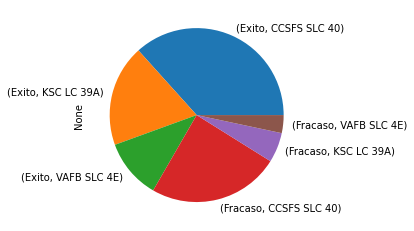

In [83]:
df4.groupby(['Class','LaunchSite']).size().rename(index=({1:'Fracaso',0:'Exito'})).plot(kind='pie')